**Цель исследования** — выявить закономерности, определяющие успешность игры, и проверить две гипотезы:
1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
2. Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

**Ход исследования**

О качестве данных ничего не известно. Поэтому перед проверкой гипотез понадобится обзор данных.
Мы проверим данные на ошибки - пропуски, аномалии, дубликаты. 
Затем, на этапе предобработки мы их устраним. Также на этапе предобработки мы рассчитаем и добавим в таблицу новые данные, которые могут нам пригодится в анализе. 
Далее приступим к исследовательскому анализу.
Затем мы составим портрет пользователя каждого региона. И наконец проверим гипотезы.
 
Таким образом, исследование пройдёт в шесть этапов:
 1. [Обзор данных](#view)
 2. [Предобработка данных](#pre)
 3. [Исследовательский анализ](#research)
 4. [Составление портретов пользователей](#portrait)
 5. [Проверка гипотез](#hypothesis)
 6. [Общий вывод](#conclusion)

## Обзор данных <a id='view'></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st

In [2]:
data = pd.read_csv('/datasets/games.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [3]:
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


## Предобработка данных <a id='pre'></a>

In [4]:
# переименование столбцов
data.columns = data.columns.str.lower()
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

Замена типа данных требуется в стоблце 'user_score' и 'year_of_release'. 

Чтобы заменить тип данных в стоблце 'year_of_release', нужно сначала удалить пропуски.

Чтобы заменить тип данных в столбце 'user_score', нужно сначала разобрать список уникальных значений.

In [5]:
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [6]:
data.shape

(16715, 11)

Пропуски незначительны в столбцах name, genre и year_of_release - эти строки мы удалим.

Пропуски в стоблце critic_score более 50%. Причина может быть в том, что оценка критиками не была проведена. В стоблце rating и user_score - около 40%. Вероятно для этих строк не была проведена оценка игрового контента, а пользователям не было предложено оценить игру.

Заменить пропуски в стоблце rating мы не сможем. А вот в стоблцах critic_score и user_score пропуски можно заменить медианой по жанру.

In [7]:
#удалим пропуски в столбцах name, genre и year_of_release
data = data.dropna(subset=['name'])
data = data.dropna(subset=['year_of_release'])
data = data.dropna(subset=['genre'])
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating             6676
dtype: int64

In [8]:
data.shape

(16444, 11)

In [9]:
#теперь поменяем тип данных в столбце 'year_of_release'
data['year_of_release'] = data['year_of_release'].astype('int')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.5+ MB


In [10]:
#теперь рассмотрим уникальные значения столбца
data['user_score'].sort_values().unique()

array(['0', '0.2', '0.3', '0.5', '0.6', '0.7', '0.9', '1', '1.1', '1.2',
       '1.3', '1.4', '1.5', '1.6', '1.7', '1.8', '1.9', '2', '2.1', '2.2',
       '2.3', '2.4', '2.5', '2.6', '2.7', '2.8', '2.9', '3', '3.1', '3.2',
       '3.3', '3.4', '3.5', '3.6', '3.7', '3.8', '3.9', '4', '4.1', '4.2',
       '4.3', '4.4', '4.5', '4.6', '4.7', '4.8', '4.9', '5', '5.1', '5.2',
       '5.3', '5.4', '5.5', '5.6', '5.7', '5.8', '5.9', '6', '6.1', '6.2',
       '6.3', '6.4', '6.5', '6.6', '6.7', '6.8', '6.9', '7', '7.1', '7.2',
       '7.3', '7.4', '7.5', '7.6', '7.7', '7.8', '7.9', '8', '8.1', '8.2',
       '8.3', '8.4', '8.5', '8.6', '8.7', '8.8', '8.9', '9', '9.1', '9.2',
       '9.3', '9.4', '9.5', '9.6', '9.7', 'tbd', nan], dtype=object)

Значение аббревиатуры tbd - To Be Determined. Значит рейтинг ещё не определен, и это значение можно приравнять к пропущеннному значению. Поэтому поменяем тип данных в столбце методом to_numeric(), там есть обработка некорректного значения.

In [11]:
data['user_score'] = pd.to_numeric(data['user_score'], errors='coerce')
data['user_score'].sort_values().unique()

array([0. , 0.2, 0.3, 0.5, 0.6, 0.7, 0.9, 1. , 1.1, 1.2, 1.3, 1.4, 1.5,
       1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8,
       2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4. , 4.1,
       4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1, 5.2, 5.3, 5.4,
       5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4, 6.5, 6.6, 6.7,
       6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8, 7.9, 8. ,
       8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. , 9.1, 9.2, 9.3,
       9.4, 9.5, 9.6, 9.7, nan])

In [13]:
#считайем суммарные продажи во всех регионах и записываем их в отдельный столбец
data['all_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


In [14]:
data['rating'] = data['rating'].fillna(value='without_rating')

In [15]:
#проверим на явные дубликаты
data.duplicated().sum()

0

In [16]:
data.duplicated(subset=['name', 'platform', 'year_of_release']).sum()

1

In [17]:
data = data.drop_duplicates(subset=['name', 'platform', 'year_of_release'], keep='first')
data.duplicated(subset=['name', 'platform', 'year_of_release']).sum()

0

Далее проверим на аномальные и дублирующиеся значения в оставшихся столбцах, кроме названия и продаж

In [18]:
data['platform'].sort_values().unique()

array(['2600', '3DO', '3DS', 'DC', 'DS', 'GB', 'GBA', 'GC', 'GEN', 'GG',
       'N64', 'NES', 'NG', 'PC', 'PCFX', 'PS', 'PS2', 'PS3', 'PS4', 'PSP',
       'PSV', 'SAT', 'SCD', 'SNES', 'TG16', 'WS', 'Wii', 'WiiU', 'X360',
       'XB', 'XOne'], dtype=object)

In [19]:
data['year_of_release'].sort_values().unique()

array([1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990,
       1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
       2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014, 2015, 2016])

In [20]:
data['genre'].sort_values().unique()

array(['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle',
       'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports',
       'Strategy'], dtype=object)

In [21]:
data['critic_score'].sort_values().unique()

array([13., 17., 19., 20., 21., 23., 24., 25., 26., 27., 28., 29., 30.,
       31., 32., 33., 34., 35., 36., 37., 38., 39., 40., 41., 42., 43.,
       44., 45., 46., 47., 48., 49., 50., 51., 52., 53., 54., 55., 56.,
       57., 58., 59., 60., 61., 62., 63., 64., 65., 66., 67., 68., 69.,
       70., 71., 72., 73., 74., 75., 76., 77., 78., 79., 80., 81., 82.,
       83., 84., 85., 86., 87., 88., 89., 90., 91., 92., 93., 94., 95.,
       96., 97., 98., nan])

In [22]:
data['rating'].sort_values().unique()

array(['AO', 'E', 'E10+', 'EC', 'K-A', 'M', 'RP', 'T', 'without_rating'],
      dtype=object)

**Вывод:** Итак, мы провели предобработку данных. Мы привели названия столбцов к нижнему регистру для удобства использования. Далее удалили незначительные по количеству строки с пропусками в столбцах с названием игр и годом выпуска. Далее поменяли тип данных в столбце с годом - это должно быть целое число, и в столбце с рейтингом пользователей - это должно быть число с плавающей точкой. Ещё мы добавили новый столбец с общими продажами - он пригодится для анализа. Ну в конце мы проверили датафрейм на дубликаты и аномалии: был удалена строка с дубликатом в столбцах название, платформа, год.

## Исследовательский анализ данных <a id='research'></a>

**1. Посмотрим, сколько игр выпускалось в разные годы.**

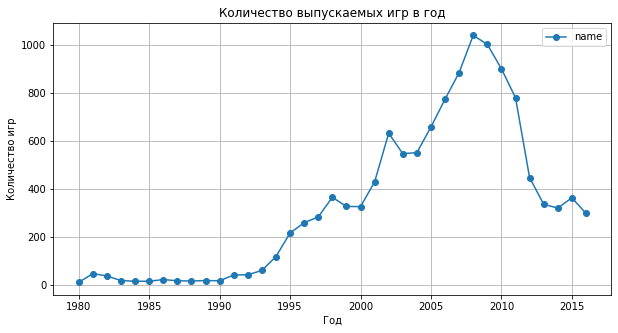

In [23]:
(
    data
    .drop_duplicates(subset=['name', 'year_of_release'], keep='first')
    .pivot_table(index='year_of_release', values='name', aggfunc='count')
    .plot(style='o-', grid=True, figsize=(10,5))
)
plt.title('Количество выпускаемых игр в год')
plt.xlabel('Год')
plt.ylabel('Количество игр')
plt.show()

Судя по графику до 1995 года выпускалось менее 200 игр в год. После 1995 года - количество начало стремительно расти и достигло своего пика к 2008-2009 годам. А дальше количество ежегодно выпускаемых игр начало снижаться.

Данные за все периоды для анализа нам не нужны.

**2. Посмотрим, как менялись продажи по платформам.**

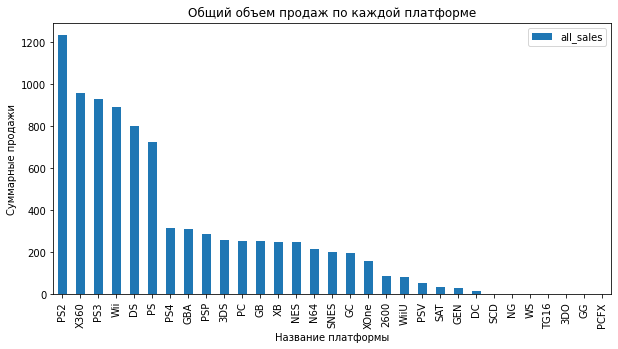

In [24]:
(
    data
    .pivot_table(index='platform', values='all_sales', aggfunc='sum')
    .sort_values(by='all_sales', ascending=False)
    .plot(kind='bar', figsize = (10, 5))
)
plt.title('Общий объем продаж по каждой платформе')
plt.xlabel('Название платформы') 
plt.ylabel('Суммарные продажи')
plt.show()

Выделяются 6 платформ с наибольшим количеством продаж. Сделаем срезы по кадой из них и построим графики по годам.

In [27]:
top_6_platform = (
    data
    .pivot_table(index='platform', values='all_sales', aggfunc= 'sum')
    .sort_values('all_sales', ascending=False)
)
top_6_platform.index[:6].tolist()

['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']

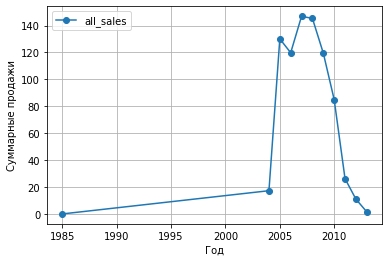

In [28]:
data_ds = data.query('platform == "DS"')
(
    data_ds
    .pivot_table(index='year_of_release', values='all_sales', aggfunc='sum')
    .plot(style='o-', grid=True)
)
plt.xlabel('Год') 
plt.ylabel('Суммарные продажи')
plt.show()

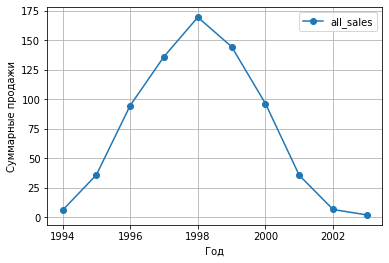

In [30]:
data_ps = data.query('platform == "PS"')
(
    data_ps
    .pivot_table(index='year_of_release', values='all_sales', aggfunc='sum')
    .plot(style='o-', grid=True)
)
plt.xlabel('Год') 
plt.ylabel('Суммарные продажи')
plt.show()

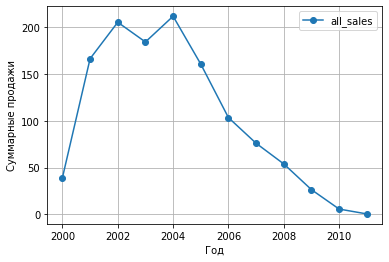

In [31]:
data_ps2 = data.query('platform == "PS2"')
(
    data_ps2
    .pivot_table(index='year_of_release', values='all_sales', aggfunc='sum')
    .plot(style='o-', grid=True)
)
plt.xlabel('Год') 
plt.ylabel('Суммарные продажи')
plt.show()

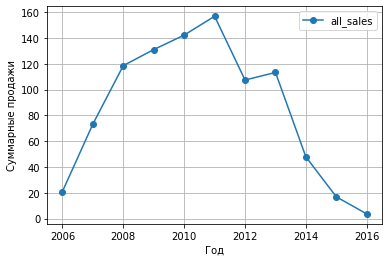

In [32]:
data_ps3 = data.query('platform == "PS3"')
(
    data_ps3
    .pivot_table(index='year_of_release', values='all_sales', aggfunc='sum')
    .plot(style='o-', grid=True)
)
plt.xlabel('Год') 
plt.ylabel('Суммарные продажи')
plt.show()

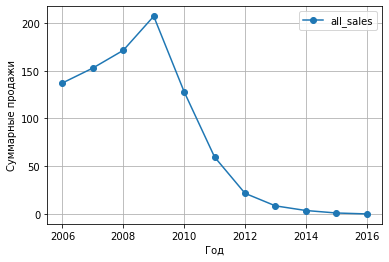

In [33]:
data_wii = data.query('platform == "Wii"')
(
    data_wii
    .pivot_table(index='year_of_release', values='all_sales', aggfunc='sum')
    .plot(style='o-', grid=True)
)
plt.xlabel('Год') 
plt.ylabel('Суммарные продажи')
plt.show()

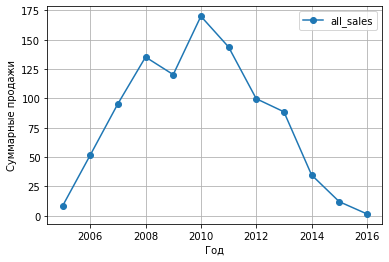

In [34]:
data_x360 = data.query('platform == "X360"')
(
    data_x360
    .pivot_table(index='year_of_release', values='all_sales', aggfunc='sum')
    .plot(style='o-', grid=True)
)
plt.xlabel('Год') 
plt.ylabel('Суммарные продажи')
plt.show()

Принимая во внимание графики, можно сказать, что в среднем платформы существуют 10 лет. У каждой платформы был старт, пик по количеству продаж и постепенный спад.

На основании предыдущих двух пунктов обозначаем актуальный период - 2014-2016 года. Сохраним датафрейм с актуальным периодом в переменную data_act.

In [35]:
data_act = data.query('year_of_release >= 2014')
data_act.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,without_rating,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,without_rating,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,without_rating,7.98


**3.Посмотрим, какие платформы лидируют по продажам, растут или падают в актуальном периоде.**

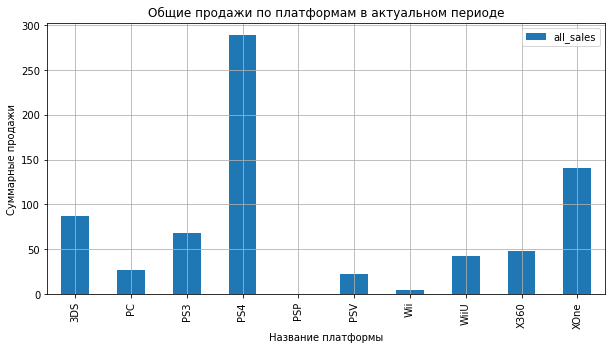

In [36]:
(
    data_act
    .pivot_table(index='platform', values='all_sales', aggfunc='sum')
    .plot(kind='bar', figsize = (10, 5), grid=True)
)
plt.title('Общие продажи по платформам в актуальном периоде')
plt.xlabel('Название платформы') 
plt.ylabel('Суммарные продажи')
plt.show()

На общем фоне выделяются три платформы с наибольшим количеством продаж - PS4, XOne, 3DS. Далее посмотрим на каких платформах продажи растут, а на каких падают.

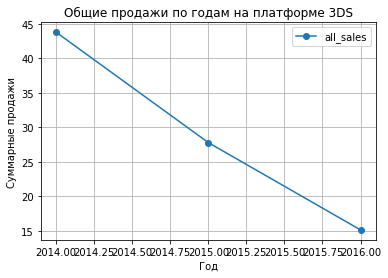

In [37]:
slice_pl_3DS = data_act.query('platform == "3DS"')
(
    slice_pl_3DS
    .pivot_table(index='year_of_release', values='all_sales', aggfunc='sum')
    .plot(style='o-', grid=True)
)
plt.title('Общие продажи по годам на платформе 3DS')
plt.xlabel('Год') 
plt.ylabel('Суммарные продажи')
plt.show()

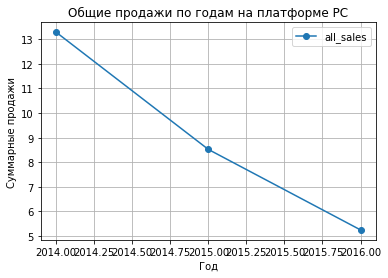

In [38]:
slice_pl = data_act.query('platform == "PC"')
(
    slice_pl
    .pivot_table(index='year_of_release', values='all_sales', aggfunc='sum')
    .plot(style='o-', grid=True)
)
plt.title('Общие продажи по годам на платформе PC')
plt.xlabel('Год') 
plt.ylabel('Суммарные продажи')
plt.show()

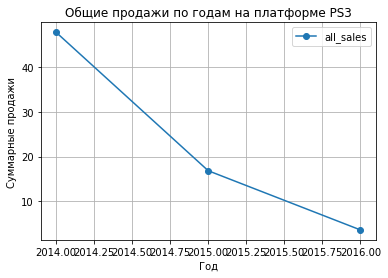

In [39]:
slice_pl_PS3 = data_act.query('platform == "PS3"')
(
    slice_pl_PS3
    .pivot_table(index='year_of_release', values='all_sales', aggfunc='sum')
    .plot(style='o-', grid=True)
)
plt.title('Общие продажи по годам на платформе PS3')
plt.xlabel('Год') 
plt.ylabel('Суммарные продажи')
plt.show()

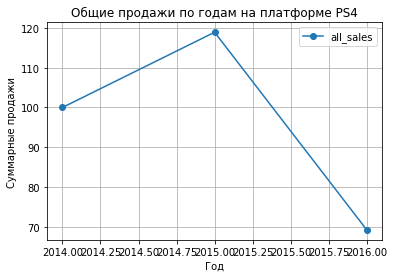

In [40]:
slice_pl_PS4 = data_act.query('platform == "PS4"')
(
    slice_pl_PS4
    .pivot_table(index='year_of_release', values='all_sales', aggfunc='sum')
    .plot(style='o-', grid=True)
)
plt.title('Общие продажи по годам на платформе PS4')
plt.xlabel('Год') 
plt.ylabel('Суммарные продажи')
plt.show()

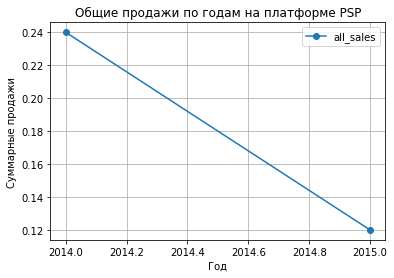

In [41]:
slice_pl = data_act.query('platform == "PSP"')
(
    slice_pl
    .pivot_table(index='year_of_release', values='all_sales', aggfunc='sum')
    .plot(style='o-', grid=True)
)
plt.title('Общие продажи по годам на платформе PSP')
plt.xlabel('Год') 
plt.ylabel('Суммарные продажи')
plt.show()

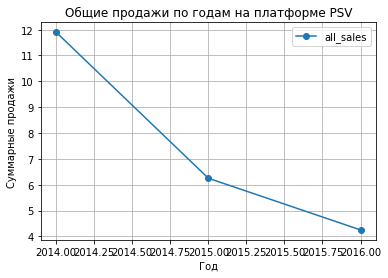

In [42]:
slice_pl = data_act.query('platform == "PSV"')
(
    slice_pl
    .pivot_table(index='year_of_release', values='all_sales', aggfunc='sum')
    .plot(style='o-', grid=True)
)
plt.title('Общие продажи по годам на платформе PSV')
plt.xlabel('Год') 
plt.ylabel('Суммарные продажи')
plt.show()

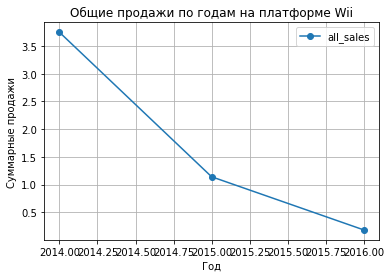

In [43]:
slice_pl_Wii = data_act.query('platform == "Wii"')
(
    slice_pl_Wii
    .pivot_table(index='year_of_release', values='all_sales', aggfunc='sum')
    .plot(style='o-', grid=True)
)
plt.title('Общие продажи по годам на платформе Wii')
plt.xlabel('Год') 
plt.ylabel('Суммарные продажи')
plt.show()

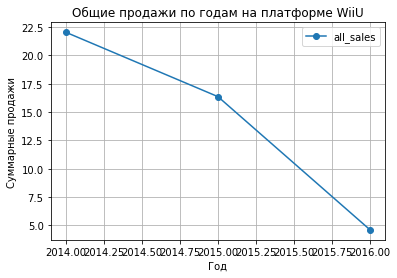

In [44]:
slice_pl_WiiU = data_act.query('platform == "WiiU"')
(
    slice_pl_WiiU
    .pivot_table(index='year_of_release', values='all_sales', aggfunc='sum')
    .plot(style='o-', grid=True)
)
plt.title('Общие продажи по годам на платформе WiiU')
plt.xlabel('Год') 
plt.ylabel('Суммарные продажи')
plt.show()

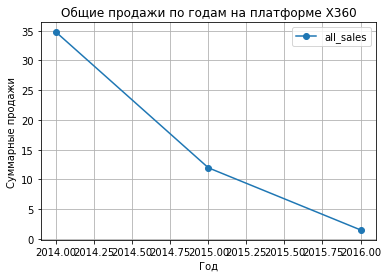

In [45]:
slice_pl_X360 = data_act.query('platform == "X360"')
(
    slice_pl_X360
    .pivot_table(index='year_of_release', values='all_sales', aggfunc='sum')
    .plot(style='o-', grid=True)
)
plt.title('Общие продажи по годам на платформе X360')
plt.xlabel('Год') 
plt.ylabel('Суммарные продажи')
plt.show()

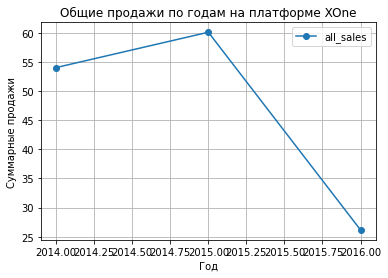

In [46]:
slice_pl_XOne = data_act.query('platform == "XOne"')
(
    slice_pl_XOne
    .pivot_table(index='year_of_release', values='all_sales', aggfunc='sum')
    .plot(style='o-', grid=True)
)
plt.title('Общие продажи по годам на платформе XOne')
plt.xlabel('Год') 
plt.ylabel('Суммарные продажи')
plt.show()

У всех платформ в последние годы наблюдается спад по продажам.

Потенциально прибылиными платформами обозначу следущих:
- PS4 - существуют с 2013 года, за 2016 год общий объем продаж был около 70 млн
- XOne - существуют также с 2013, за 2016 год объем продаж чуть более 27 млн
- 3DS - существуют с 2011 года, за 2016 год объем продаж был примерно 15 млн

**4.Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам.**

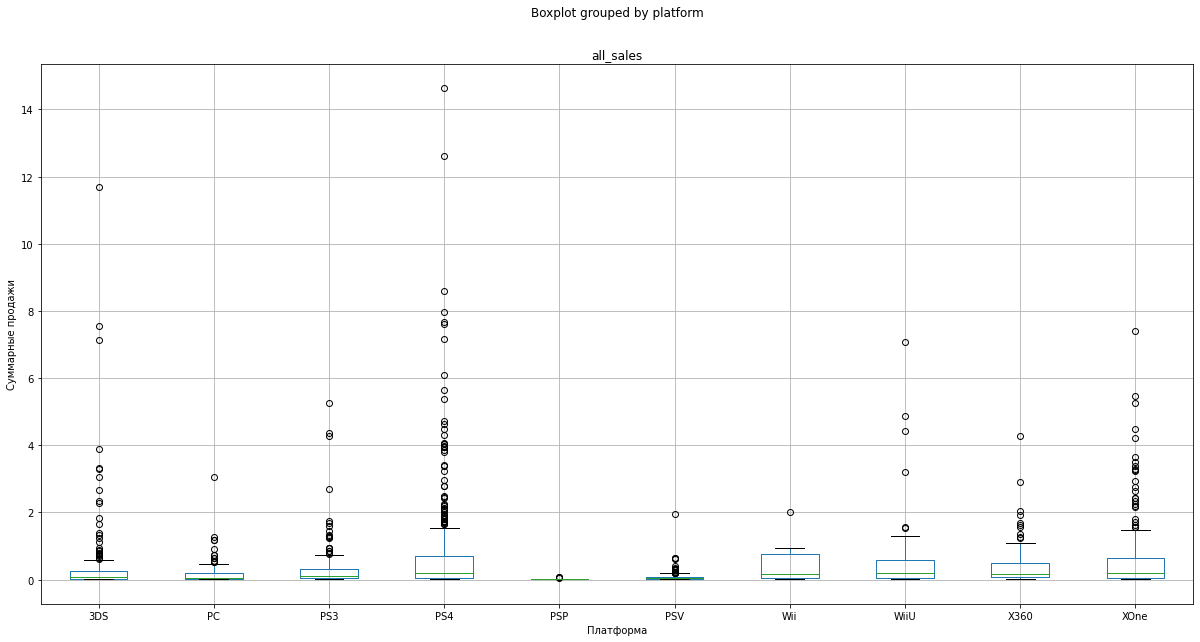

In [48]:
(
    data_act
    .boxplot(column = 'all_sales', by='platform', figsize = (20, 10), grid=True)
)
plt.xlabel('Платформа') 
plt.ylabel('Суммарные продажи')
plt.show()

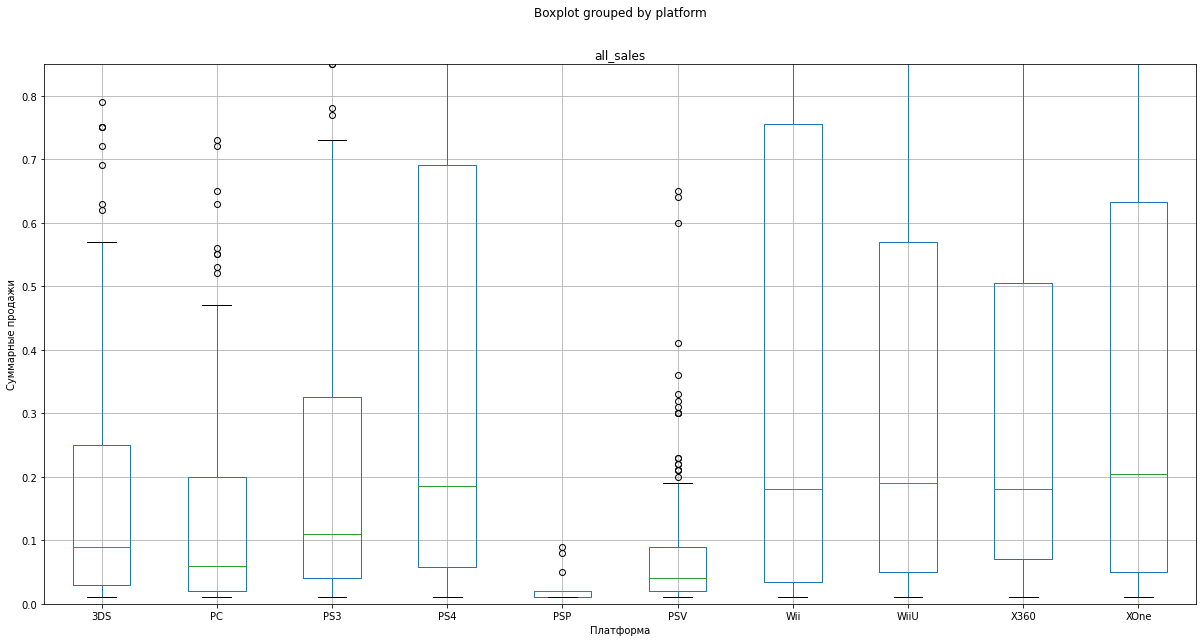

In [49]:
(
    data_act
    .boxplot(column = 'all_sales', by='platform', figsize = (20, 10), grid=True)
)
plt.ylim(0, 0.85)
plt.xlabel('Платформа') 
plt.ylabel('Суммарные продажи')
plt.show()

У всех платформ достаточно много выбросов.
Для начала рассмотрим результаты перспективных платформ.

PS4. Медианное значение глобальной продажи игры на этой платформе равно примерно 180 тыс. Нормальный размах находится до 1,75 млн. По графику видно, насколько медиана не стремится к длинному хвосту высоких значений. 50% всех проданных игр на платформе имеют глобальную стоимость примерно от 60 тыс до 690 тыс.

XOne. Медианное значение глобальной продажи игры на этой платформе равно примерно 200 тыс. Нормальный размах находится до 1,60 млн. Здесь медиана также не стремится к длинному хвосту высоких значений. 50% всех проданных игр на платформе имеют глобальную стоимость примерно от 50 тыс до 630 тыс.

3DS. Медианное значение глобальной продажи игры на этой платформе равно примерно 90 тыс. Нормальный размах находится до 570 тыс. 50% всех проданных игр на платформе имеют глобальную стоимость примерно от 30 тыс до 250 тыс.

Здесь также хочется отметить платформу WiiU - у нее одна из самых высоких медианных стоимостей игры. И 50% всех игр было продано за цену в диапазоне от 50 тыс до 570 тыс. Хотя суммарные продажи до последний год менее 5 млн. Добавим ее к перспективным.

**5.Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами.**

Ранее мы выделили три платформы с наибольшим количеством продаж - PS4, XOne, 3DS, WiiU. Построим для каждой из них диаграммы рассеяния с отзывами критиков и пользователей.

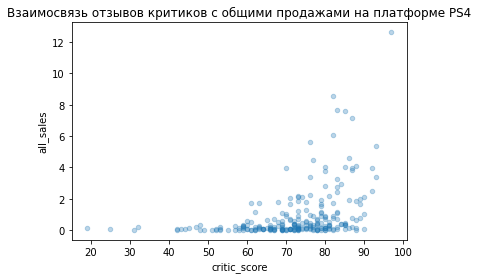

In [50]:
slice_pl_PS4.plot(x='critic_score', y='all_sales', kind='scatter', alpha=0.3)
plt.title('Взаимосвязь отзывов критиков с общими продажами на платформе PS4')
plt.show()

In [51]:
#посчитаем кофэффициент корреляции
slice_pl_PS4['critic_score'].corr(slice_pl_PS4['all_sales'])

0.40266141068104083

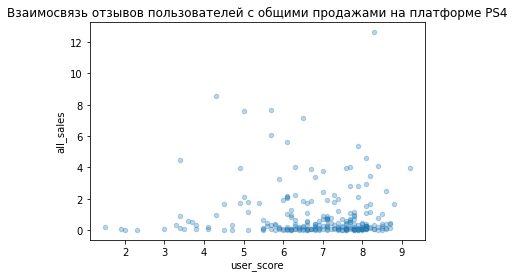

In [52]:
slice_pl_PS4.plot(x='user_score', y='all_sales', kind='scatter', alpha=0.3)
plt.title('Взаимосвязь отзывов пользователей с общими продажами на платформе PS4')
plt.show()

In [53]:
#посчитаем кофэффициент корреляции
slice_pl_PS4['user_score'].corr(slice_pl_PS4['all_sales'])

-0.040131589472697356

Итак, принимая во внимание графики и коэффицинты, для платформы PS4 выявлена очень слабая прямая связь между отзывами критиков и общими продажами. А вот связи между отзывами пользователей и продажами нет.

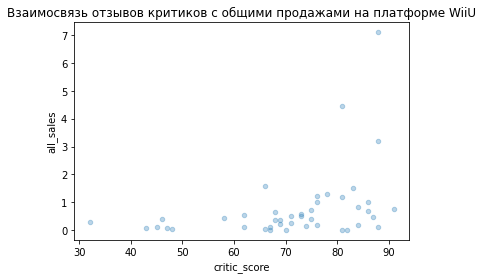

In [54]:
slice_pl_WiiU.plot(x='critic_score', y='all_sales', kind='scatter', alpha=0.3)
plt.title('Взаимосвязь отзывов критиков с общими продажами на платформе WiiU')
plt.show()

In [55]:
#посчитаем кофэффициент корреляции
slice_pl_WiiU['critic_score'].corr(slice_pl_WiiU['all_sales'])

0.370201412480884

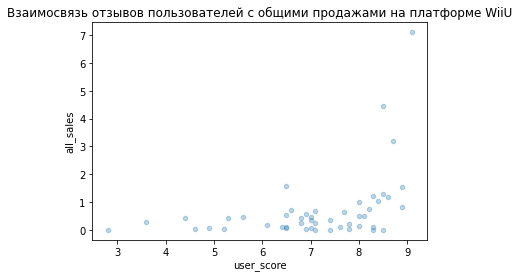

In [56]:
slice_pl_WiiU.plot(x='user_score', y='all_sales', kind='scatter', alpha=0.3)
plt.title('Взаимосвязь отзывов пользователей с общими продажами на платформе WiiU')
plt.show()

In [57]:
#посчитаем кофэффициент корреляции
slice_pl_WiiU['user_score'].corr(slice_pl_WiiU['all_sales'])

0.40792645792170773

Для платформы WiiU можно утверждать, что связь между отзывами как критиков, так и пользователей, есть, но она слабая.

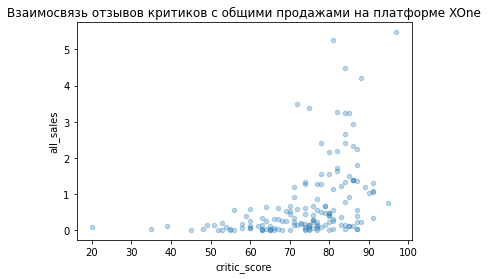

In [58]:
slice_pl_XOne.plot(x='critic_score', y='all_sales', kind='scatter', alpha=0.3)
plt.title('Взаимосвязь отзывов критиков с общими продажами на платформе XOne')
plt.show()

In [59]:
#посчитаем кофэффициент корреляции
slice_pl_XOne['critic_score'].corr(slice_pl_XOne['all_sales'])

0.42867694370333226

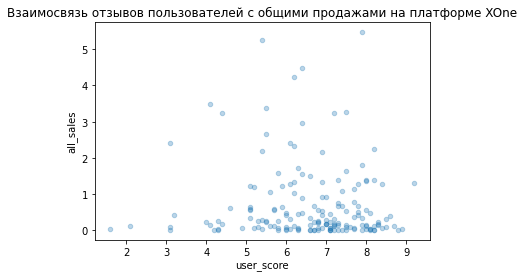

In [60]:
slice_pl_XOne.plot(x='user_score', y='all_sales', kind='scatter', alpha=0.3)
plt.title('Взаимосвязь отзывов пользователей с общими продажами на платформе XOne')
plt.show()

In [61]:
#посчитаем кофэффициент корреляции
slice_pl_XOne['user_score'].corr(slice_pl_XOne['all_sales'])

-0.0703839280647581

На основании полученных графиков и коэффициентов вывод такой - для платформы XOne наблюдается слабая прямая связь между отзывами критиков и общими продажами.
Между отзывами пользователей и общими продажами связи не выявлено, так как коэффициент корреляции близок к нулю.

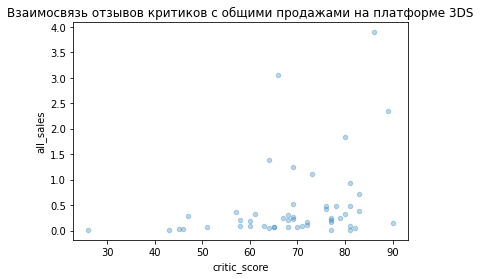

In [62]:
slice_pl_3DS.plot(x='critic_score', y='all_sales', kind='scatter', alpha=0.3)
plt.title('Взаимосвязь отзывов критиков с общими продажами на платформе 3DS')
plt.show()

In [63]:
slice_pl_3DS['critic_score'].corr(slice_pl_3DS['all_sales'])

0.314117492869051

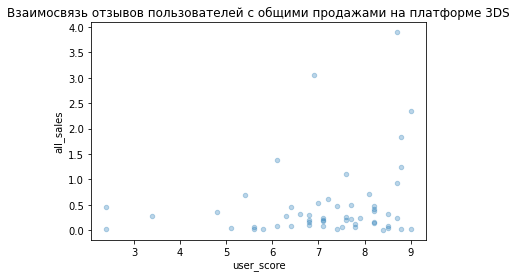

In [64]:
slice_pl_3DS.plot(x='user_score', y='all_sales', kind='scatter', alpha=0.3)
plt.title('Взаимосвязь отзывов пользователей с общими продажами на платформе 3DS')
plt.show()

In [65]:
slice_pl_3DS['user_score'].corr(slice_pl_3DS['all_sales'])

0.2151932718527028

Для платформы 3DS наблюдается слабая прямая связь между отзывами критиков и общими продажами.
Между отзывами пользователей и общими продажами связь ещё более слабая.

**Общий вывод:** Проанализировав взаимосвязь отзывов и продаж для популярных платформ, можно сделать вывод, что  объемы продаж на любой платформе не связаны с отзывами критиков или пользователей.

**6.Посмотрим на общее распределение игр и продаж по жанрам.**

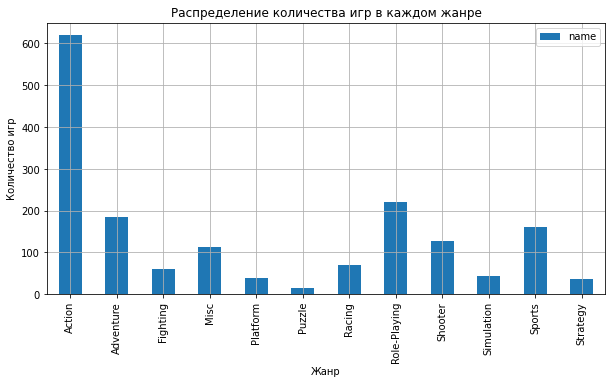

In [66]:
(
    data_act
    .pivot_table(index='genre', values='name', aggfunc='count')
    .plot(kind='bar', figsize = (10, 5), grid=True)
)
plt.title('Распределение количества игр в каждом жанре')
plt.xlabel('Жанр') 
plt.ylabel('Количество игр')
plt.show()

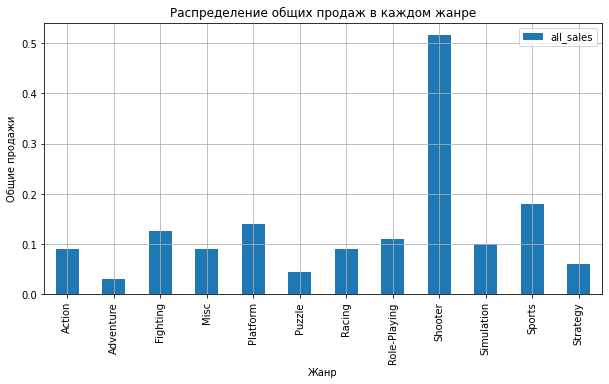

In [67]:
(
    data_act
    .pivot_table(index='genre', values='all_sales', aggfunc='median')
    .plot(kind='bar', figsize = (10, 5), grid=True)
)
plt.title('Распределение общих продаж в каждом жанре')
plt.xlabel('Жанр') 
plt.ylabel('Общие продажи')
plt.show()

На первом графике выделяется жанр Action - более 600 игр. Но меданные продажи у него средние - около 90 тыс.

Следующий по количеству игр жанр Role-Playing - около 230 игр. При этом медианные продажи даже выше, чем у Action - 110 тыс.

Далее жанр Adventure - примерно 190 игр. И самые маленькие медианные продажи - менее 40 тыс.

Жанр Sports - около 170 игр. И здесь уже хорошие медианные продажи - около 180 тыс.

Жанр Shooter - примерно 130 игр. А вот медианные продажи самые высокие - более 500 тыс.

Также хорошие медианные продажи в жанре Platform - примерно 130 тыс при небольшом количестве - всего около 40 игр.

Жанр Fighting тоже имеет хорошие меданные продажи - около 120 тыс, количество - около 60 игр.

**Общий вывод:** наиболее прибыльными жанрами обозначим Shooter, Sports, Platform, Fighting.

## Портрет пользователя каждого региона <a id='portrait'></a>

**Северная Америка.**

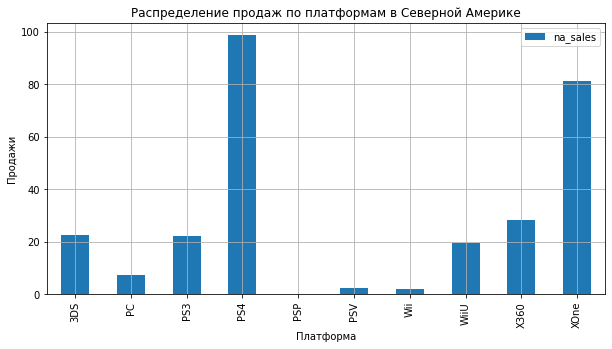

In [68]:
(
    data_act
    .pivot_table(index='platform', values='na_sales', aggfunc='sum')
    .plot(kind='bar', figsize = (10, 5), grid=True)
)
plt.title('Распределение продаж по платформам в Северной Америке')
plt.xlabel('Платформа') 
plt.ylabel('Продажи')
plt.show()

Топ-5 платформ в Северной Америке: PS4, XOne, X360, 3DS, PS3.
Около 100 млн было продано на платформе PS4, а на PS3 чуть более 20 млн.

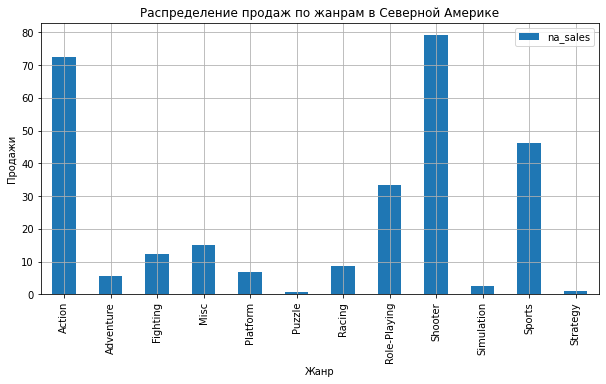

In [69]:
(
    data_act
    .pivot_table(index='genre', values='na_sales', aggfunc='sum')
    .plot(kind='bar', figsize = (10, 5), grid=True)
)
plt.title('Распределение продаж по жанрам в Северной Америке')
plt.xlabel('Жанр') 
plt.ylabel('Продажи')
plt.show()

Топ-5 жанров в Северной Америке: Shooter, Action, Sports, Role_Playing, Misc.

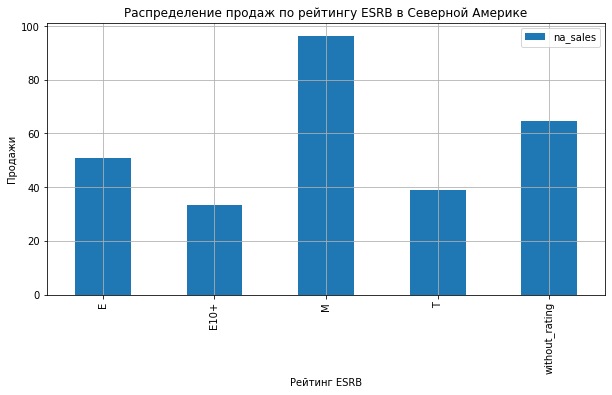

In [70]:
(
    data_act
    .pivot_table(index='rating', values='na_sales', aggfunc='sum')
    .plot(kind='bar', figsize = (10, 5), grid=True)
)
plt.title('Распределение продаж по рейтингу ESRB в Северной Америке')
plt.xlabel('Рейтинг ESRB') 
plt.ylabel('Продажи')
plt.show()

Наиболее продаваемые игры с категорией М и без рейтинга. Меньше всего продают категорию Е10+.

**Европа.**

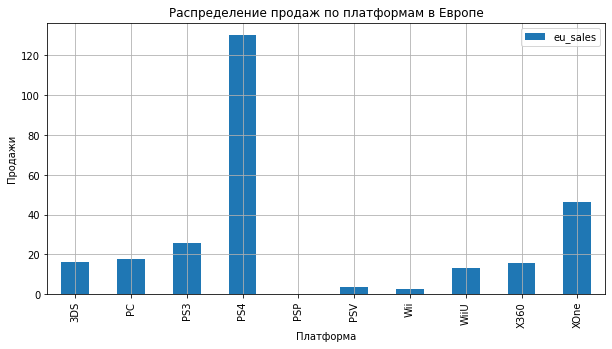

In [71]:
(
    data_act
    .pivot_table(index='platform', values='eu_sales', aggfunc='sum')
    .plot(kind='bar', figsize = (10, 5), grid=True)
)
plt.title('Распределение продаж по платформам в Европе')
plt.xlabel('Платформа') 
plt.ylabel('Продажи')
plt.show()

Топ-5 платформ в Европе: PS4, XOne, PS3, PC, 3DS. Почти все совпадают с Северной Америкой - PS4, XOne, PS3, 3DS.

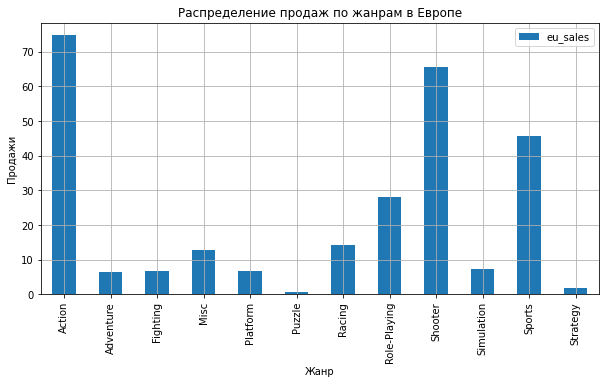

In [72]:
(
    data_act
    .pivot_table(index='genre', values='eu_sales', aggfunc='sum')
    .plot(kind='bar', figsize = (10, 5), grid=True)
)
plt.title('Распределение продаж по жанрам в Европе')
plt.xlabel('Жанр') 
plt.ylabel('Продажи')
plt.show()

Топ-5 жанров в Европе: Action, Shooter, Sports, Role-Playing, Racing. Почти все жанры совпадают с Северной Америкой.

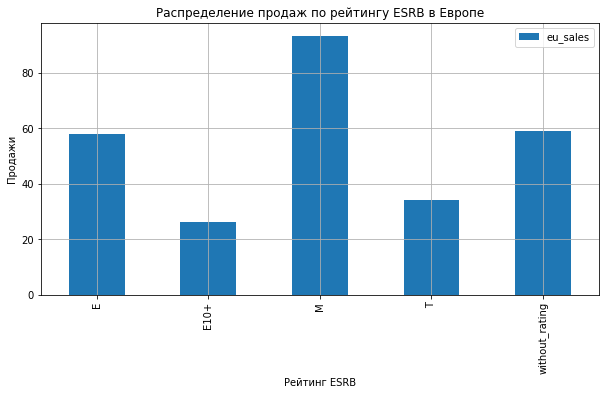

In [73]:
(
    data_act
    .pivot_table(index='rating', values='eu_sales', aggfunc='sum')
    .plot(kind='bar', figsize = (10, 5), grid=True)
)
plt.title('Распределение продаж по рейтингу ESRB в Европе')
plt.xlabel('Рейтинг ESRB') 
plt.ylabel('Продажи')
plt.show()

Здесь также - наиболее продаваемы игры с категорией М и без рейтинга. Менее продаваемые Е10+.

**Япония.**

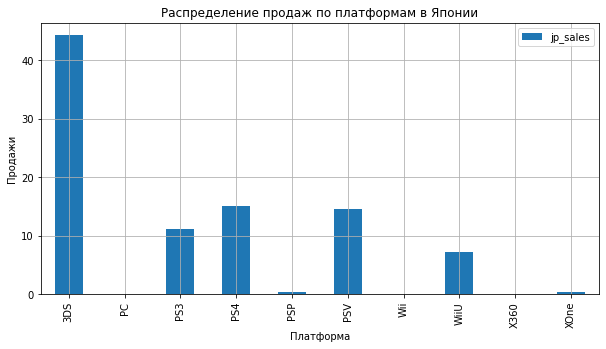

In [74]:
(
    data_act
    .pivot_table(index='platform', values='jp_sales', aggfunc='sum')
    .plot(kind='bar', figsize = (10, 5), grid=True)
)
plt.title('Распределение продаж по платформам в Японии')
plt.xlabel('Платформа') 
plt.ylabel('Продажи')
plt.show()

Топ-5 платформ в Японии: 3DS, PS4, PSV, PS3, WiiU. Здесь остаются всё те же платформы как в Америке и Европе 3DS, PS4, PS3. Но и добавились новые PSV и WiiU.

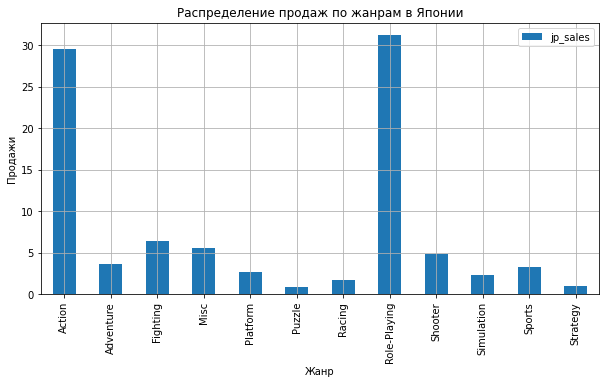

In [75]:
(
    data_act
    .pivot_table(index='genre', values='jp_sales', aggfunc='sum')
    .plot(kind='bar', figsize = (10, 5), grid=True)
)
plt.title('Распределение продаж по жанрам в Японии')
plt.xlabel('Жанр') 
plt.ylabel('Продажи')
plt.show()

Топ-5 жанров в Японии: Role-Playing, Action, Fighting, Misc, Shooter. Наиболее популярные жанры Role-Playing и Action - они выделяются на общем фоне. И здесь появляется жанр, которого нет в других регионах -  Fighting.

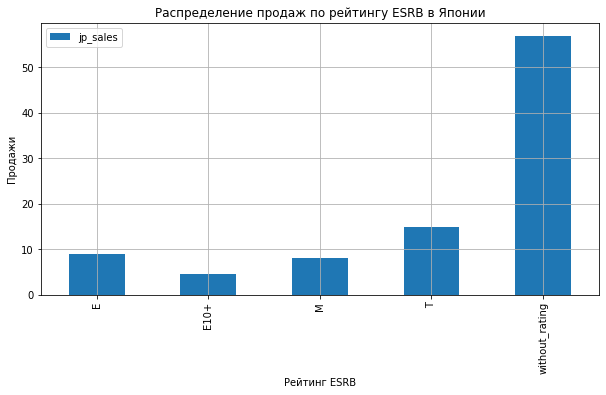

In [76]:
(
    data_act
    .pivot_table(index='rating', values='jp_sales', aggfunc='sum')
    .plot(kind='bar', figsize = (10, 5), grid=True)
)
plt.title('Распределение продаж по рейтингу ESRB в Японии')
plt.xlabel('Рейтинг ESRB') 
plt.ylabel('Продажи')
plt.show()

По рейтингу ESRB немного другая картина. Самые продаваемые игры без рейтинга. Второй по продаваемости рейтинг Т. Менее продаваемым так и остается рейтинг Е10+.

**Общий вывод:** Портреты пользователей Северной Америки и Европы в общем похожи. Они предпочитают платформы PS4, XOne, PS3, 3DS. Наиболее продаваемые жанры - Shooter, Action, Sports, Role_Playing. Наиболее продаваемые игры в этих регионах с рейтингом М (для взрослых) и без рейтинга. Меньше всего продают рейтинг Е10+ (от 10 лет).

Портрет пользователя Японии немного отличается. Он выбирает всё те же платформы 3DS, PS4, PS3. Но и добавились новые PSV и WiiU. Наиболее популярные жанры Role-Playing и Action - они явно выделяются на общем фоне. И здесь появляется жанр, которого нет в других регионах -  Fighting. Самые продаваемые игры без рейтинга. Менее продаваемым так и остается рейтинг Е10+.

То, что в Японии лидерами продаж являются игры без рейтинга ESRB, скорее всего объясняется тем, что внутри страны есть собственный рейтинг игр. В Европе тоже есть свой, но он используется в половине государств, поэтому продажи по рейтингу в Европе похожи на продажи в Америке.

## Проверка гипотез <a id='hypothesis'></a>

Нулевая гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC равны. (средние двух ген.совокупностей равны между собой)

Альтернативная гипотеза: Средние пользовательские рейтинги платформы Xbox One и PC разные. (это утверждение,которое принимается верным, если отбрасывается нулевая гипотеза. в данном случае альт.гипотеза двусторонняя)

In [77]:
data_filt = data_act.dropna(subset=['user_score'])

In [78]:
user_score_XOne = list(data_filt[data_filt['platform'] == 'XOne']['user_score'])
user_score_PC = list(data_filt[data_filt['platform'] == 'PC']['user_score'])

alpha = 0.05

results = st.ttest_ind(user_score_XOne, user_score_PC)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.10450507919348415
Не получилось отвергнуть нулевую гипотезу


**Вывод:** Значение p-value очень близко к нулю. p-value показывает: вероятности случайно получить такое или большее различие почти нет. Поэтому отвергаем нулевую гипотезу, приниаем альтернативную - средние пользовательские рейтинги платформы Xbox One и PC разные.

Нулевая гипотеза: Средние пользовательские рейтинги жанров Action и Sports равны. (средние двух ген.совокупностей равны между собой)

Альтернативная гипотеза: Средние пользовательские рейтинги жанров Action и Sports разные. (это утверждение,которое принимается верным, если отбрасывается нулевая гипотеза. в данном случае альт.гипотеза двусторонняя)

In [79]:
user_score_Action = list(data_filt[data_filt['genre'] == 'Action']['user_score'])
user_score_Sports = list(data_filt[data_filt['genre'] == 'Sports']['user_score'])

alpha = 0.05

results = st.ttest_ind(user_score_Action, user_score_Sports)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 2.8711147985105864e-19
Отвергаем нулевую гипотезу


**Вывод:** Значение p-value немного больше порогового значения alpha. p-value показывает: вероятность случайно получить такое или большее различие равно почти 7%, хотя средние пользовательские оценки жанров и не одинаковы. Это большая вероятность, чтобы делать вывод о значимом различии между средними оценками. Поэтому и не получилось отвергнуть нулевую гипотезу.

## Общий вывод <a id='conclusion'></a>

В начале нашего анализа мы выделили актуальный период – 2014-2016 года. В этом периоде мы обозначили три потенциально прибыльные платформы, за этот период у них наибольшее количество продаж:
 - PS4 – суммарные продажи около 290 млн за три года, за 2016 год общий объем продаж был около 70 млн
- XOne – общие продажи за три года примерно 140 млн, за 2016 год объем продаж чуть более 27 млн
- 3DS – за три года примерно 80 млн продаж, за 2016 год объем продаж был примерно 15 млн

Далее мы провели оценку медианной продажи на каждой из платформ. Наибольшие значения на платформах PS4 и XOne – 180 тыс  и 200 тыс соответственно. Также на этом этапе было решено добавить к перспективным платформу WiiU, хотя общие продажи за три года были около 40 млн, но медианная стоимость продажи составила около 200 тыс.

Далее мы проверили **взаимосвязь общих продаж с оценками критиков и пользователей** и выяснили, что в основном связь, если и есть, то очень слабая. Коэффициент корреляции в районе 0,4. Поэтому не рекомендуем опираться на оценки при выборе успешной игры.

Далее мы выбрали наиболее **прибыльные жанры**:
- Shooter – 130 игр за три года, медианная продажа более 500 тыс.
- Sports – 170 игр за три года, медианная продажа около 180 тыс
- Platform – 40 игр за три года, медианная продажа 130 тыс
- Fighting – 60 игр за три года, медианная продажа 120 тыс

Следующим этапом мы составили портреты пользователей для разных регионов.

**Портреты пользователей Северной Америки и Европы** в общем похожи. Они предпочитают платформы:
- PS4 (100 млн для Америки, 130 млн для Европы),
- XOne(27 млн для Америки, 47млн для Европы), 
- PS3(22 млн для Америки, 24 млн для Европы), 
- 3DS(22 млн для Америки, 18 млн для Европы). 

Наиболее продаваемые жанры – Shooter (Америка - 80 млн, Европа – 65 млн) , Action (Америка - 72 млн, Европа – 75 млн), Sports (Америка – 47 млн, Европа – 46 млн), Role_Playing(Америка – 33 млн, Европа – 28 млн).

Наиболее продаваемые игры в этих регионах с рейтингом   ESRB «М» - для взрослых (Америка – 97 млн, Европа – 90 млн) и без рейтинга (Америка – 63 млн, Европа – 60 млн). Меньше всего продают рейтинг Е10+ (от 10 лет).

**Портрет пользователя Японии** немного отличается. Он выбирает всё те же платформы 3DS (44 млн), PS4 (15 млн), PS3 (11 млн). Но и добавились новые PSV(14 млн) и WiiU(7 млн). Наиболее популярные жанры Role-Playing (32 млн) и Action (29 млн) - они явно выделяются на общем фоне. И здесь появляется жанр, которого нет в других регионах – Fighting (6 млн). Самые продаваемые игры без рейтинга  ESRB (57 млн). Менее продаваемым так и остается рейтинг Е10+.

И последним этапом мы **проверили две гипотезы**: 
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые – мы ее отвергли, так как  значение p-value было очень близко к нулю. 
- Средние пользовательские рейтинги жанров Action и Sports равны – мы не смогли её отвергнуть, так как значение p-value оказалось немного больше порогового значения alpha в 0.05.

Обобщая всю полученную информацию, можно дать следующие рекомендации:

Для успешных продаж в Северной Америке и Европе рекомендуется продавать на платформах PS4, XOne, 3DS жанры Shooter, Sports с рейтингом ESRB «М» или без него.

Для успешных продаж в Японии рекомендуем размещать на платформах 3DS, PS4, WiiU жанры Shooter и Fighting без рейтинга ESRB.